In [49]:
## import basic library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Preprocessing of the data
from sklearn.preprocessing import StandardScaler, OneHotEncoder, minmax_scale

#To split the data
from sklearn.model_selection import train_test_split

#To do the feature enngineering
from sklearn.impute import SimpleImputer

#To make pipeline
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer

#ML Algos for regression problem
from sklearn.linear_model import LinearRegression, Lasso, Ridge,LassoCV, RidgeCV,LogisticRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

#For cross validation
from sklearn.model_selection import cross_val_score

#For Hyper parameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#For model evaluation
#For regression problem
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## Get the data and process the data first

In [3]:
data=pd.read_csv("Dataset_17_feat.csv")
data.head()

,Experimental_index,DP_Group,LA/GA,Polymer_MW,CL Ratio,Drug_Tm,Drug_Pka,Initial D/M ratio,DLC,SA-V,SE,Drug_Mw,Drug_TPSA,Drug_NHA,Drug_LogP,Time,T=0.25,T=0.5,T=1.0,Release
0,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.0,130.08,65.72,5.0,-0.8,0.00,0.09,0.19,0.35,0.00
1,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.0,130.08,65.72,5.0,-0.8,0.26,0.09,0.19,0.35,0.07
2,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.0,130.08,65.72,5.0,-0.8,1.06,0.09,0.19,0.35,0.40
3,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.0,130.08,65.72,5.0,-0.8,2.09,0.09,0.19,0.35,0.57
4,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.0,130.08,65.72,5.0,-0.8,3.11,0.09,0.19,0.35,0.69


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3783 entries, 0 to 3782
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Experimental_index  3783 non-null   int64  
 1   DP_Group            3783 non-null   object 
 2   LA/GA               3783 non-null   float64
 3   Polymer_MW          3783 non-null   float64
 4   CL Ratio            3783 non-null   float64
 5   Drug_Tm             3783 non-null   float64
 6   Drug_Pka            3783 non-null   float64
 7   Initial D/M ratio   3783 non-null   float64
 8   DLC                 3783 non-null   float64
 9   SA-V                3783 non-null   float64
 10  SE                  3783 non-null   float64
 11  Drug_Mw             3783 non-null   float64
 12  Drug_TPSA           3783 non-null   float64
 13  Drug_NHA            3783 non-null   float64
 14  Drug_LogP           3783 non-null   float64
 15  Time                3783 non-null   float64
 16  T=0.25

In [221]:
## removing irreevent columns and taking only PLGA based dds data
df=data[data["DP_Group"].str.contains('PLGA')]
df

,Experimental_index,DP_Group,LA/GA,Polymer_MW,CL Ratio,Drug_Tm,Drug_Pka,Initial D/M ratio,DLC,SA-V,SE,Drug_Mw,Drug_TPSA,Drug_NHA,Drug_LogP,Time,T=0.25,T=0.5,T=1.0,Release
0,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.00,130.08,65.72,5.0,-0.80,0.00,0.09,0.19,0.35,0.00
1,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.00,130.08,65.72,5.0,-0.80,0.26,0.09,0.19,0.35,0.07
2,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.00,130.08,65.72,5.0,-0.80,1.06,0.09,0.19,0.35,0.40
3,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.00,130.08,65.72,5.0,-0.80,2.09,0.09,0.19,0.35,0.57
4,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.00,130.08,65.72,5.0,-0.80,3.11,0.09,0.19,0.35,0.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,89,TTD-PLGA,1.0,8300.0,0.0,206.0,10.28,0.1,0.06,112.25,0.01,325.50,23.47,2.0,5.34,19.86,0.06,0.09,0.15,0.99
3779,89,TTD-PLGA,1.0,8300.0,0.0,206.0,10.28,0.1,0.06,112.25,0.01,325.50,23.47,2.0,5.34,21.88,0.06,0.09,0.15,1.00
3780,89,TTD-PLGA,1.0,8300.0,0.0,206.0,10.28,0.1,0.06,112.25,0.01,325.50,23.47,2.0,5.34,24.16,0.06,0.09,0.15,1.00
3781,89,TTD-PLGA,1.0,8300.0,0.0,206.0,10.28,0.1,0.06,112.25,0.01,325.50,23.47,2.0,5.34,26.19,0.06,0.09,0.15,1.00


In [222]:
## dropping the  columns
df=df.drop(columns=['Experimental_index', 'DP_Group'])

In [223]:
df

,LA/GA,Polymer_MW,CL Ratio,Drug_Tm,Drug_Pka,Initial D/M ratio,DLC,SA-V,SE,Drug_Mw,Drug_TPSA,Drug_NHA,Drug_LogP,Time,T=0.25,T=0.5,T=1.0,Release
0,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.00,130.08,65.72,5.0,-0.80,0.00,0.09,0.19,0.35,0.00
1,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.00,130.08,65.72,5.0,-0.80,0.26,0.09,0.19,0.35,0.07
2,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.00,130.08,65.72,5.0,-0.80,1.06,0.09,0.19,0.35,0.40
3,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.00,130.08,65.72,5.0,-0.80,2.09,0.09,0.19,0.35,0.57
4,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.00,130.08,65.72,5.0,-0.80,3.11,0.09,0.19,0.35,0.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,1.0,8300.0,0.0,206.0,10.28,0.1,0.06,112.25,0.01,325.50,23.47,2.0,5.34,19.86,0.06,0.09,0.15,0.99
3779,1.0,8300.0,0.0,206.0,10.28,0.1,0.06,112.25,0.01,325.50,23.47,2.0,5.34,21.88,0.06,0.09,0.15,1.00
3780,1.0,8300.0,0.0,206.0,10.28,0.1,0.06,112.25,0.01,325.50,23.47,2.0,5.34,24.16,0.06,0.09,0.15,1.00
3781,1.0,8300.0,0.0,206.0,10.28,0.1,0.06,112.25,0.01,325.50,23.47,2.0,5.34,26.19,0.06,0.09,0.15,1.00


In [224]:
# pearson matrix
corr=df.corr()

In [225]:
## correlated parameters
corr_param=set()
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i,j])>0.9:
            col_name=corr.columns[i]
            corr_param.add(col_name)

In [226]:
corr_param

{'DLC', 'Drug_NHA', 'Drug_TPSA', 'T=0.5', 'T=1.0'}

In [227]:
##Now dropping the correlated parameters
df=df.drop(columns=['DLC', 'Drug_NHA', 'Drug_TPSA', 'T=0.5', 'T=1.0'])
df

,LA/GA,Polymer_MW,CL Ratio,Drug_Tm,Drug_Pka,Initial D/M ratio,SA-V,SE,Drug_Mw,Drug_LogP,Time,T=0.25,Release
0,1.0,104000.0,0.0,282.5,7.76,0.8,76.73,0.00,130.08,-0.80,0.00,0.09,0.00
1,1.0,104000.0,0.0,282.5,7.76,0.8,76.73,0.00,130.08,-0.80,0.26,0.09,0.07
2,1.0,104000.0,0.0,282.5,7.76,0.8,76.73,0.00,130.08,-0.80,1.06,0.09,0.40
3,1.0,104000.0,0.0,282.5,7.76,0.8,76.73,0.00,130.08,-0.80,2.09,0.09,0.57
4,1.0,104000.0,0.0,282.5,7.76,0.8,76.73,0.00,130.08,-0.80,3.11,0.09,0.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,1.0,8300.0,0.0,206.0,10.28,0.1,112.25,0.01,325.50,5.34,19.86,0.06,0.99
3779,1.0,8300.0,0.0,206.0,10.28,0.1,112.25,0.01,325.50,5.34,21.88,0.06,1.00
3780,1.0,8300.0,0.0,206.0,10.28,0.1,112.25,0.01,325.50,5.34,24.16,0.06,1.00
3781,1.0,8300.0,0.0,206.0,10.28,0.1,112.25,0.01,325.50,5.34,26.19,0.06,1.00


In [14]:
## separating x and y
x=df.drop(df[['Release']], axis=1)
y=df['Release']

### Now splitting the data

In [31]:
##splitting 75% and 25%
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, random_state=42)

In [32]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1435, 12), (479, 12), (1435,), (479,))

### make pipe line to transform/preprocess the data to train models

In [42]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1914 entries, 0 to 3782
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LA/GA              1914 non-null   float64
 1   Polymer_MW         1914 non-null   float64
 2   CL Ratio           1914 non-null   float64
 3   Drug_Tm            1914 non-null   float64
 4   Drug_Pka           1914 non-null   float64
 5   Initial D/M ratio  1914 non-null   float64
 6   SA-V               1914 non-null   float64
 7   SE                 1914 non-null   float64
 8   Drug_Mw            1914 non-null   float64
 9   Drug_LogP          1914 non-null   float64
 10  Time               1914 non-null   float64
 11  T=0.25             1914 non-null   float64
dtypes: float64(12)
memory usage: 194.4 KB


In [106]:
##get the numerical datatypes
num_colms=x.select_dtypes(include=['int32', 'int64', 'float64']).columns
##Now to get the categorical data
cat_colms=x.select_dtypes(include=['object']).columns

# numerical pipeline to transform the numerical features
num_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

#  categorical pipeline to transform the categorical features
cat_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine both pipelines using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('Numerical', num_pipe, num_colms),
    ('Categorical', cat_pipe, cat_colms)
])

In [140]:
normal_evauation={}
tuned_evaluation={}

In [108]:
## Function to evalute all the model
def model_evaluate(model):
    pipe=Pipeline([
    ('preprocessor',  preprocessor),
    ('regressor',  model)
])
    pipe.fit(x_train, y_train)
    y_pred=pipe.predict(x_test)
    R2=r2_score(y_pred, y_test)
    mAE=mean_absolute_error(y_pred, y_test)
    mSE=mean_squared_error(y_pred, y_test)
    if model not in normal_evauation:
          normal_evauation[model]={'R2': R2, 'MAE': mAE, 'MSE': mSE}
    else:
        normal_evaluation[model_name]['R2'] = R2
        normal_evaluation[model_name]['MAE'] = mAE
        normal_evaluation[model_name]['MSE'] = mSE


### Now individual pipe for individual models

### 1. Liner regression

In [119]:
##Liner regressor pipe
pipe_LR=Pipeline([
    ('preprocessor',  preprocessor),
    ('regressor',  LinearRegression())
])

pipe_LR.fit(x_train, y_train)

y_pred=pipe_LR.predict(x_test)

R2=r2_score(y_pred, y_test)
MSE=mean_squared_error(y_pred, y_test)
MAE=mean_absolute_error(y_pred, y_test)

R2, MSE, MAE

(0.31379827914439384, 0.04552815868104898, 0.17389089570132343)

### 2. Knn Regression

In [120]:
## Now for Knn Regressor
pipe_KR=Pipeline([
    ('preprocessor',  preprocessor),
    ('regressor',  KNeighborsRegressor())
])

pipe_KR.fit(x_train, y_train)

y_pred=pipe_KR.predict(x_test)

R2=r2_score(y_pred, y_test)
MSE=mean_squared_error(y_pred, y_test)
MAE=mean_absolute_error(y_pred, y_test)

R2, MSE, MAE

(0.8162266686068405, 0.018683148225469733, 0.07918580375782881)

### 3. Decision Tree Regression

In [121]:
## Now for Decision Tree Regressor
pipe_DT=Pipeline([
    ('preprocessor',  preprocessor),
    ('regressor',  DecisionTreeRegressor())
])

pipe_DT.fit(x_train, y_train)

y_pred=pipe_DT.predict(x_test)

R2=r2_score(y_pred, y_test)
MSE=mean_squared_error(y_pred, y_test)
MAE=mean_absolute_error(y_pred, y_test)

R2, MSE, MAE

(0.923227869491579, 0.008711325678496869, 0.052453027139874736)

### 4. Random Forest Regression

In [123]:
## Now for Random Forest  Regressor
pipe_RF=Pipeline([
    ('preprocessor',  preprocessor),
    ('regressor',  RandomForestRegressor())
])

pipe_RF.fit(x_train, y_train)

y_pred=pipe_RF.predict(x_test)

R2=r2_score(y_pred, y_test)
MSE=mean_squared_error(y_pred, y_test)
MAE=mean_absolute_error(y_pred, y_test)

R2, MSE, MAE

(0.9485301281865721, 0.005506452628425031, 0.04631452380952382)

### 5. XgBoost Regression

In [124]:
## Now for Xgboost Regressor
pipe_XG=Pipeline([
    ('preprocessor',  preprocessor),
    ('regressor',  XGBRegressor())
])

pipe_XG.fit(x_train, y_train)

y_pred=pipe_XG.predict(x_test)

R2=r2_score(y_pred, y_test)
MSE=mean_squared_error(y_pred, y_test)
MAE=mean_absolute_error(y_pred, y_test)

R2, MSE, MAE

(0.9749079260018091, 0.002874310582720292, 0.03557742994471155)

### 6. Gradient Boosting

In [126]:
## Now for Gradient Boosting Regressor
pipe_GB=Pipeline([
    ('preprocessor',  preprocessor),
    ('regressor',  GradientBoostingRegressor())
])

pipe_GB.fit(x_train, y_train)

y_pred=pipe_GB.predict(x_test)

R2=r2_score(y_pred, y_test)
MSE=mean_squared_error(y_pred, y_test)
MAE=mean_absolute_error(y_pred, y_test)

R2, MSE, MAE

(0.8836110873817717, 0.01145898904368302, 0.07717889278259024)

### 7. Adaboost Regressor

In [125]:
## Now for Adaboost Regressor->>Very bad model
pipe_AR=Pipeline([
    ('preprocessor',  preprocessor),
    ('regressor',  AdaBoostRegressor())
])

pipe_AR.fit(x_train, y_train)

y_pred=pipe_AR.predict(x_test)

R2=r2_score(y_pred, y_test)
MSE=mean_squared_error(y_pred, y_test)
MAE=mean_absolute_error(y_pred, y_test)

R2, MSE, MAE

(0.35575798298430183, 0.02957005703518993, 0.15058436390586424)

### 8. SVR

In [127]:
## Now for SVR Regressor-Good enough
pipe_SVR=Pipeline([
    ('preprocessor',  preprocessor),
    ('regressor',  SVR())
])

pipe_SVR.fit(x_train, y_train)

y_pred=pipe_SVR.predict(x_test)

R2=r2_score(y_pred, y_test)
MSE=mean_squared_error(y_pred, y_test)
MAE=mean_absolute_error(y_pred, y_test)

R2, MSE, MAE

(0.8083825140561187, 0.019983043880389136, 0.10068196629652214)

### one single function to train and evaluate all the model

In [524]:
##storing all the evaluation matrics for all the models
normal_evauation={}

In [525]:
## Function to evalute all the model
def model_evaluate(models, preprocessor, x_train, y_train, x_test, y_test, model_names, normal_evaluation):
    for model, model_name in zip(models, model_names):
        pipe=Pipeline([
            ('preprocessor', preprocessor),
             ('regressor', model)
        ])
    
        pipe.fit(x_train, y_train)
        y_pred=pipe.predict(x_test)
        R2=r2_score(y_pred, y_test)
        mAE=mean_absolute_error(y_pred, y_test)
        mSE=mean_squared_error(y_pred, y_test)
        if model_name not in normal_evauation:
            normal_evauation[model_name]={'R2': R2, 'MAE': mAE, 'MSE': mSE}


In [526]:
##List of models , want the training and evalation
models=[
    LinearRegression(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    XGBRegressor(),
    GradientBoostingRegressor(),
    AdaBoostRegressor(),
    SVR()
]

model_names=[
     'Linear Regression',
    'KNeighbors Regressor',
    'DecisionTreeRegressor',
    'Random Forest',
    'XGBRegressor',
    'Gradient Boosting Regressor',
    'Ada Boost Regressor',
    'Support Vector Regressor'
]


model_evaluate(models, preprocessor, x_train, y_train, x_test, y_test, model_names, normal_evaluation)


In [527]:
normal_evauation.keys()

dict_keys(['Linear Regression', 'KNeighbors Regressor', 'DecisionTreeRegressor', 'Random Forest', 'XGBRegressor', 'Gradient Boosting Regressor', 'Ada Boost Regressor', 'Support Vector Regressor'])

In [494]:
normal_evaluate_df=pd.DataFrame(normal_evauation)
normal_evaluate_df

,Linear Regression,KNeighbors Regressor,DecisionTreeRegressor,Random Forest,XGBRegressor,Gradient Boosting Regressor,Ada Boost Regressor,Support Vector Regressor
R2,0.313798,0.816227,0.924418,0.946126,0.974908,0.883611,0.315254,0.808383
MAE,0.173891,0.079186,0.053309,0.047161,0.035577,0.077179,0.153463,0.100682
MSE,0.045528,0.018683,0.008599,0.005761,0.002874,0.011459,0.030530,0.019983


In [495]:
df_metrics=normal_evaluate_df.transpose().reset_index()
df_metrics

,index,R2,MAE,MSE
0,Linear Regression,0.313798,0.173891,0.045528
1,KNeighbors Regressor,0.816227,0.079186,0.018683
2,DecisionTreeRegressor,0.924418,0.053309,0.008599
3,Random Forest,0.946126,0.047161,0.005761
4,XGBRegressor,0.974908,0.035577,0.002874
5,Gradient Boosting Regressor,0.883611,0.077179,0.011459
6,Ada Boost Regressor,0.315254,0.153463,0.030530
7,Support Vector Regressor,0.808383,0.100682,0.019983


In [489]:
df_metrics.columns

Index(['index', 'R2', 'MAE', 'MSE'], dtype='object')

In [499]:
df_metrics.rename(columns={'index': 'Modals'})

,Modals,R2,MAE,MSE
0,Linear Regression,0.313798,0.173891,0.045528
1,KNeighbors Regressor,0.816227,0.079186,0.018683
2,DecisionTreeRegressor,0.924418,0.053309,0.008599
3,Random Forest,0.946126,0.047161,0.005761
4,XGBRegressor,0.974908,0.035577,0.002874
5,Gradient Boosting Regressor,0.883611,0.077179,0.011459
6,Ada Boost Regressor,0.315254,0.153463,0.030530
7,Support Vector Regressor,0.808383,0.100682,0.019983


In [506]:
#save it as csv file
#df_metrics.to_csv('df_metrics.csv', index=False)

#### plotting 

In [529]:
list(normal_evauation.keys())

['Linear Regression',
 'KNeighbors Regressor',
 'DecisionTreeRegressor',
 'Random Forest',
 'XGBRegressor',
 'Gradient Boosting Regressor',
 'Ada Boost Regressor',
 'Support Vector Regressor']

In [531]:
normal_evauation.items()

dict_items([('Linear Regression', {'R2': 0.31379827914439384, 'MAE': 0.17389089570132343, 'MSE': 0.04552815868104898}), ('KNeighbors Regressor', {'R2': 0.8162266686068405, 'MAE': 0.07918580375782881, 'MSE': 0.018683148225469733}), ('DecisionTreeRegressor', {'R2': 0.9181707431649149, 'MAE': 0.05345511482254697, 'MSE': 0.009229488517745304}), ('Random Forest', {'R2': 0.9503522978109674, 'MAE': 0.04639307287006662, 'MSE': 0.0053357926268537085}), ('XGBRegressor', {'R2': 0.9749079260018091, 'MAE': 0.03557742994471155, 'MSE': 0.002874310582720292}), ('Gradient Boosting Regressor', {'R2': 0.8836110873817717, 'MAE': 0.07717889278259024, 'MSE': 0.01145898904368302}), ('Ada Boost Regressor', {'R2': 0.38034423387574445, 'MAE': 0.1498535435595905, 'MSE': 0.029704423519062845}), ('Support Vector Regressor', {'R2': 0.8083825140561187, 'MAE': 0.10068196629652214, 'MSE': 0.019983043880389136})])

In [ ]:
sns.boxplot()

### One simple function to train and  store the predicted results of the models

In [208]:
##dictionary to store the result
result_dict={}

In [228]:
def prediction(models, preprocessor, x_train, y_train, x_test, y_test, model_names, result_dict):
    for model, model_name in zip(models, model_names):
        pipe=Pipeline([
            ('preprocessor', preprocessor),
             ('regressor', model)
        ])
    
        pipe.fit(x_train, y_train)
        y_pred=pipe.predict(x_test)
        
        result_dict[model_name] = y_pred.tolist()
    

In [229]:
##List of models , want the training and evalation
models=[
    LinearRegression(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    XGBRegressor(),
    GradientBoostingRegressor(),
    AdaBoostRegressor(),
    SVR()
]

model_names=[
     'Linear Regression',
    'KNeighbors Regressor',
    'DecisionTreeRegressor',
    'Random Forest',
    'XGBRegressor',
    'Gradient Boosting Regressor',
    'Ada Boost Regressor',
    'Support Vector Regressor'
]


prediction(models, preprocessor, x_train, y_train, x_test, y_test, model_names, result_dict)


In [230]:
result_dict.keys()

dict_keys(['Linear Regression', 'KNeighbors Regressor', 'DecisionTreeRegressor', 'Random Forest', 'XGBRegressor', 'Gradient Boosting Regressor', 'Ada Boost Regressor', 'Support Vector Regressor'])

In [235]:
pd.DataFrame(result_dict)

,Linear Regression,KNeighbors Regressor,DecisionTreeRegressor,Random Forest,XGBRegressor,Gradient Boosting Regressor,Ada Boost Regressor,Support Vector Regressor
0,0.680359,0.784,0.67,0.731600,0.715404,0.828891,0.740584,0.816408
1,0.571028,0.742,0.75,0.697100,0.735639,0.767185,0.659870,0.653667
2,0.216532,0.018,0.02,0.014900,0.018844,0.042278,0.193374,0.103157
3,-0.000081,0.012,0.01,0.011542,0.011452,-0.013615,0.175249,-0.087748
4,0.427478,0.566,0.48,0.477600,0.737429,0.621751,0.582985,0.533367
...,...,...,...,...,...,...,...,...
474,0.460092,0.166,0.23,0.321800,0.204642,0.493565,0.606852,0.369650
475,0.200968,0.028,0.00,0.000000,-0.005572,-0.035174,0.177747,-0.053655
476,0.010850,0.044,0.04,0.037000,0.027397,0.049013,0.210906,-0.002810
477,0.068832,0.056,0.07,0.060456,0.058732,0.085044,0.265806,0.039642


In [246]:
#  y_test.values
model_names

['Linear Regression',
 'KNeighbors Regressor',
 'DecisionTreeRegressor',
 'Random Forest',
 'XGBRegressor',
 'Gradient Boosting Regressor',
 'Ada Boost Regressor',
 'Support Vector Regressor']

In [237]:
df_predict=pd.DataFrame(result_dict)
df_predict['Real value'] = y_test.values

# Rearrange columns
columns_order = ['Real value'] + model_names
df_predict = df_predict[columns_order]

In [238]:
df_predict

,Real value,Linear Regression,KNeighbors Regressor,DecisionTreeRegressor,Random Forest,XGBRegressor,Gradient Boosting Regressor,Ada Boost Regressor,Support Vector Regressor
0,0.77,0.680359,0.784,0.67,0.731600,0.715404,0.828891,0.740584,0.816408
1,0.74,0.571028,0.742,0.75,0.697100,0.735639,0.767185,0.659870,0.653667
2,0.01,0.216532,0.018,0.02,0.014900,0.018844,0.042278,0.193374,0.103157
3,0.02,-0.000081,0.012,0.01,0.011542,0.011452,-0.013615,0.175249,-0.087748
4,0.91,0.427478,0.566,0.48,0.477600,0.737429,0.621751,0.582985,0.533367
...,...,...,...,...,...,...,...,...,...
474,0.21,0.460092,0.166,0.23,0.321800,0.204642,0.493565,0.606852,0.369650
475,0.00,0.200968,0.028,0.00,0.000000,-0.005572,-0.035174,0.177747,-0.053655
476,0.04,0.010850,0.044,0.04,0.037000,0.027397,0.049013,0.210906,-0.002810
477,0.06,0.068832,0.056,0.07,0.060456,0.058732,0.085044,0.265806,0.039642


In [268]:
df_predict.to_csv('results.csv', index=False)

In [247]:
len(result_dict)

8

In [266]:
# scatter plot for each model
# for col in df_predict.columns[1:]:  # Excluding the first column ('Real Value')
#     plt.scatter(df_predict['Real value'], df_predict[col], label=col)

# # Plot the diagonal line representing perfect prediction
# plt.plot(df_predict['Real value'], df_predict['Real value'], color='red', linestyle='-', label='Perfect Prediction')

# # Set labels and title
# plt.xlabel('Real Value')
# plt.ylabel('Predicted Value')
# plt.title('Real vs. Predicted Values for Each Model')

# # Add legend
# plt.legend()

# # Show plot
# plt.show()


### Plotting Prediction of each model vs Real values

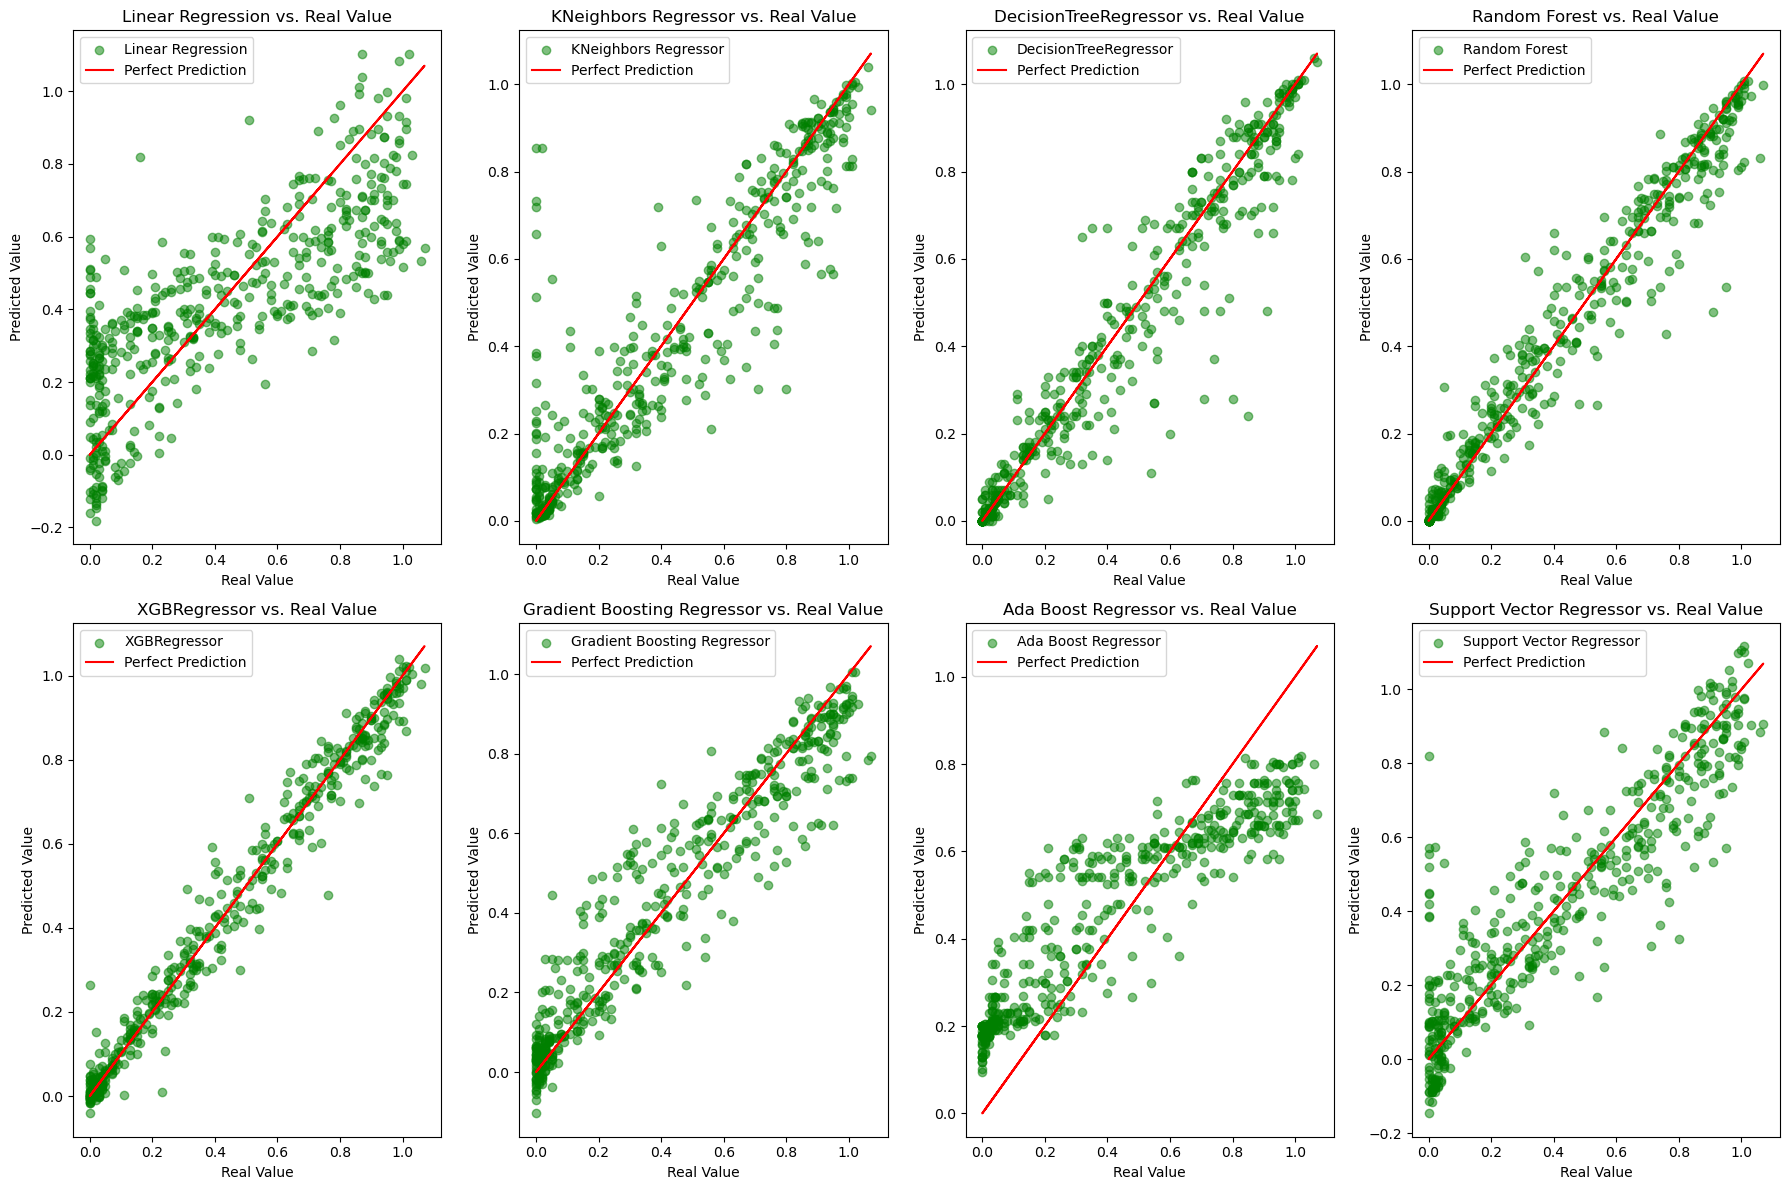

In [265]:
##plotting
num_models = len(df_predict.columns) - 1  # Exclude the first column ('Real value')

#  subplots with 2 rows and 4 columns
fig, axes = plt.subplots(2, 4, figsize=(18, 12))

# Flatten axes for easier indexing
axes = axes.flatten()

for i, col in enumerate(df_predict.columns[1:]):  # excluding the first column (Real value)
    ax = axes[i]
    ax.scatter(df_predict['Real value'],  df_predict[col],  label=col,   color='green',   alpha=0.5)
    ax.plot(df_predict['Real value'],   df_predict['Real value'],    color='red',    linestyle='-',   label='Perfect Prediction')
    ax.set_xlabel('Real Value')
    ax.set_ylabel('Predicted Value')
    ax.set_title(f'{col} vs. Real Value')
    ax.legend()

# Adjust layout
plt.tight_layout()

#saving
plt.savefig('model_comparison_plot.png')

plt.show()


### Hyperparameter tuning

#### For Random Forest

In [399]:
param_grid={
    "regressor__n_estimators": [50, 100,200],
#     "regressor__max_features":["auto","sqrt","log2"],
#     "regressor__criterion":['mse', 'friedman_mse', 'mae', 'poisson'],
#     "regressor__max_depth":[None, 5, 10, 15]
}

grid_search=GridSearchCV(pipe_RF, param_grid, cv=10, n_jobs=-1)

In [400]:
 grid_search.fit(x_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('Numerical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['LA/GA', 'Polymer_MW', 'CL Ratio', 'Drug_Tm', 'Drug_Pka',
       'Initial D/M ratio', 'SA-V', 'SE', 'Drug_Mw', 'Drug_LogP', 'Time',
       'T=0.25'],
      dtype='object')),
                                                                        ('Categorical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index([], dtype='object'))])),
                                       ('regressor', RandomForestRegressor())]),
             n_jobs=-1, param_grid={'regressor__n_estimators': [50, 100, 200]})

In [403]:
grid_search.best_params_

{'regressor__n_estimators': 50}

In [404]:
## for Random Forest  Regressor
pipe_RF=Pipeline([
    ('preprocessor',  preprocessor),
    ('regressor',  RandomForestRegressor(n_estimators=50))
])

pipe_RF.fit(x_train, y_train)

y_pred=pipe_RF.predict(x_test)

R2=r2_score(y_pred, y_test)
MSE=mean_squared_error(y_pred, y_test)
MAE=mean_absolute_error(y_pred, y_test)

R2, MSE, MAE

(0.9466066524127811, 0.005716073099307893, 0.04759784173377076)

### Finding best params for all the models

In [342]:
params_grid = {
    'Linear Regression': {},
    
    'KNeighbors Regressor': {
        'regressor__n_neighbors': [3, 5, 7, 9],
    },
    
    'DecisionTreeRegressor': {
        'regressor__max_depth': [None, 5, 10, 20],
        'regressor__min_samples_split': [2, 5, 10],
        'regressor__min_samples_leaf': [1, 2, 4]
    },
    
    'Random Forest': {
        'regressor__n_estimators': [50, 100, 200],
        'regressor__max_depth': [None, 10, 20],
    },
    
    'XGBRegressor': {
        'regressor__learning_rate': [0.01, 0.05, 0.1],
        'regressor__n_estimators': [50, 100, 200],
    },
    
    'Gradient Boosting Regressor': {
        'regressor__n_estimators': [50, 100, 200],
        'regressor__learning_rate': [0.01, 0.05, 0.1],
    },
    
    'Ada Boost Regressor': {
        'regressor__n_estimators': [50, 100, 200],
        'regressor__learning_rate': [0.01, 0.05, 0.1],
    },
    
    'Support Vector Regressor': {
        'regressor__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'regressor__C': [0.1, 1, 10, 100],
        'regressor__gamma': ['scale', 'auto'],
        'regressor__epsilon': [0.1, 0.2, 0.5, 0.3]
    }
}


In [331]:
##For one single model
# params_grid['Support Vector Regressor']
#grid_search=GridSearchCV(pipe_LR, param_grid[model_name], cv=10, n_jobs=-1)

{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
 'C': [0.1, 1, 10, 100],
 'gamma': ['scale', 'auto'],
 'epsilon': [0.1, 0.2, 0.5, 0.3]}

In [343]:
##best parameters dictionary
best_params={}

In [344]:
def param_tuning(models, preprocessor, x_train, y_train, x_test, y_test, model_names, params_grid, best_params ):
    for model, model_name in zip(models, model_names):
        pipe = Pipeline([
            ('preprocessor', preprocessor),
            ('regressor', model)
        ])
    
        grid_search = GridSearchCV(pipe, params_grid[model_name], cv=10, n_jobs=-1)
        grid_search.fit(x_train, y_train)
        best_params[model_name] = grid_search.best_params_


In [345]:
##List of models , want the training and evalation
models=[
    LinearRegression(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    XGBRegressor(),
    GradientBoostingRegressor(),
    AdaBoostRegressor(),
    SVR()
]

model_names=[
     'Linear Regression',
    'KNeighbors Regressor',
    'DecisionTreeRegressor',
    'Random Forest',
    'XGBRegressor',
    'Gradient Boosting Regressor',
    'Ada Boost Regressor',
    'Support Vector Regressor'
]


param_tuning(models, preprocessor, x_train, y_train, x_test, y_test, model_names, params_grid, best_params)


In [346]:
best_params

{'Linear Regression': {},
 'KNeighbors Regressor': {'regressor__n_neighbors': 3},
 'DecisionTreeRegressor': {'regressor__max_depth': None,
  'regressor__min_samples_leaf': 1,
  'regressor__min_samples_split': 2},
 'Random Forest': {'regressor__max_depth': 20, 'regressor__n_estimators': 50},
 'XGBRegressor': {'regressor__learning_rate': 0.1,
  'regressor__n_estimators': 200},
 'Gradient Boosting Regressor': {'regressor__learning_rate': 0.1,
  'regressor__n_estimators': 200},
 'Ada Boost Regressor': {'regressor__learning_rate': 0.1,
  'regressor__n_estimators': 200},
 'Support Vector Regressor': {'regressor__C': 100,
  'regressor__epsilon': 0.1,
  'regressor__gamma': 'scale',
  'regressor__kernel': 'rbf'}}

In [380]:
best_params['XGBRegressor']

{'regressor__learning_rate': 0.1, 'regressor__n_estimators': 200}

### Tuning of XGBRegressor


In [381]:
## Now for Xgboost Regressor
pipe_XG=Pipeline([
    ('preprocessor',  preprocessor),
    ('regressor',  XGBRegressor(learning_rate=0.1, n_estimators=200))
])

pipe_XG.fit(x_train, y_train)

y_pred=pipe_XG.predict(x_test)

R2=r2_score(y_pred, y_test)
MSE=mean_squared_error(y_pred, y_test)
MAE=mean_absolute_error(y_pred, y_test)

R2, MSE, MAE


(0.9725046619387084, 0.003125436459692004, 0.03547906951495399)